In [1]:
import pandas as pd, numpy as np, re, os

## Evaluator is a home-made class for load results and elaborating them
from src.evaluation import Evaluator, compilerPatterns, ResultsFromMeanStdDF
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
## This cell would need for testing phase - Ignore this
%load_ext autoreload
%autoreload 2

In [3]:
## looking for moses directory experiments only
paths = [ os.path.join(dataset.name, experiment.name) 
         for dataset in os.scandir('experiments') if dataset.is_dir() and 'moses_' in dataset.name
         for experiment in os.scandir(dataset.path)  if 'hl' in experiment.name
           ]

In [4]:
paths

['moses_SELFIES-RNN/2hl_512hu_256bs_0.001lr',
 'moses_SELFIES-RNN/2hl_512hu_512bs_0.001lr',
 'moses_SELFIES-RNN/2hl_256hu_256bs_0.001lr',
 'moses_SELFIES-RNN/2hl_256hu_512bs_0.001lr',
 'moses_SELFIES-RNN/3hl_256hu_256bs_0.001lr',
 'moses_SELFIES-RNN/3hl_256hu_512bs_0.001lr',
 'moses_SELFIES-RNN/3hl_512hu_256bs_0.001lr',
 'moses_SELFIES-RNN/3hl_512hu_512bs_0.001lr',
 'moses_SMILES-RNN/2hl_512hu_256bs_0.001lr',
 'moses_SMILES-RNN/2hl_512hu_512bs_0.001lr',
 'moses_SMILES-RNN/2hl_256hu_256bs_0.001lr',
 'moses_SMILES-RNN/2hl_256hu_512bs_0.001lr',
 'moses_SMILES-RNN/3hl_256hu_256bs_0.001lr',
 'moses_SMILES-RNN/3hl_256hu_512bs_0.001lr',
 'moses_SMILES-RNN/3hl_512hu_256bs_0.001lr',
 'moses_SMILES-RNN/3hl_512hu_512bs_0.001lr',
 'moses_fragSMILES-RNN/2hl_512hu_256bs_300es_0.001lr',
 'moses_fragSMILES-RNN/2hl_512hu_512bs_300es_0.001lr',
 'moses_fragSMILES-RNN/2hl_256hu_256bs_300es_0.001lr',
 'moses_fragSMILES-RNN/2hl_256hu_512bs_300es_0.001lr',
 'moses_fragSMILES-RNN/3hl_256hu_256bs_300es_0.001lr

In [5]:
evaluators = [Evaluator(path) for path in paths]

In [6]:
evaluators_table = pd.concat([evaluator.get_as_DFcell() for evaluator in evaluators ], ignore_index=True, axis=0)

In [10]:
evaluators_table = evaluators_table.drop(columns=['dataset','aug','notation']).groupby(['hl','hu','bs','lr']).agg(lambda x: x.dropna())

In [11]:
evaluators_table

SELFIES  \
hl hu  bs  lr                                                         
2  256 256 0.001  <src.evaluation.Evaluator object at 0x7f1051d9...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f1051df...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7f1051df...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f105280...   
3  256 256 0.001  <src.evaluation.Evaluator object at 0x7f1051dc...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f1051e1...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7f1051e1...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f1051e1...   

                                                             SMILES  \
hl hu  bs  lr                                                         
2  256 256 0.001  <src.evaluation.Evaluator object at 0x7f1049d4...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f1049d4...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7f1049d4...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f1051e1...   
3  256 256 0.001  <src.evaluation.Evaluator object at 0x7f1049d4...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f1049d4...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7f1049d4...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f1049d4...   

                                                         fragSMILES  \
hl hu  bs  lr                                                         
2  256 256 0.001  <src.evaluation.Evaluator object at 0x7f104278...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f104278...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7f1049d4...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f1049d4...   
3  256 256 0.001  <src.evaluation.Evaluator object at 0x7f104278...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f104278...   
   512 256 0.001  <src.evaluation.Evaluator object at 0x7f104278...   
       512 0.001  <src.evaluation.Evaluator object at 0x7f104278...   

                                                           t-SMILES  
hl hu  bs  lr                                                        
2  256 256 0.001  <src.evaluation.Evaluator object at 0x7f104278...  
       512 0.001  <src.evaluation.Evaluator object at 0x7f104278...  
   512 256 0.001  <src.evaluation.Evaluator object at 0x7f104278...  
       512 0.001  <src.evaluation.Evaluator object at 0x7f104278...  
3  256 256 0.001  <src.evaluation.Evaluator object at 0x7f104278...  
       512 0.001  <src.evaluation.Evaluator object at 0x7f104278...  
   512 256 0.001  <src.evaluation.Evaluator object at 0x7f104278...  
       512 0.001  <src.evaluation.Evaluator object at 0x7f104278...

In [12]:
evaluators_table.map(lambda x: x.load_logs())

SELFIES  SMILES  fragSMILES  t-SMILES
hl hu  bs  lr                                          
2  256 256 0.001     True    True        True      True
       512 0.001     True    True        True      True
   512 256 0.001     True    True        True      True
       512 0.001     True    True        True      True
3  256 256 0.001     True    True        True      True
       512 0.001     True    True        True      True
   512 256 0.001     True    True        True      True
       512 0.001     True    True        True      True

In [13]:
evaluators_table.map(lambda x: x.load_samples())

SELFIES  SMILES  fragSMILES  t-SMILES
hl hu  bs  lr                                          
2  256 256 0.001     True    True        True      True
       512 0.001     True    True        True      True
   512 256 0.001     True    True        True      True
       512 0.001     True    True        True      True
3  256 256 0.001     True    True        True      True
       512 0.001     True    True        True      True
   512 256 0.001     True    True        True      True
       512 0.001     True    True        True      True

## Syntax metrics - Validity, Uniqueness and Novelty

In [17]:
genDFs=pd.concat( [evaluator.getResultsGens() for evaluator in evaluators if evaluator.samples is not None], ignore_index=True )

In [18]:
genDFs['valid%']=genDFs['valid']/genDFs['amount']
genDFs['unique%']=genDFs['unique']/genDFs['valid']
genDFs['novel%']=genDFs['novel']/genDFs['unique']

In [19]:
genDFs

,fold,amount,epoch,T,valid,unique,novel,dataset,aug,notation,hl,hu,bs,lr,valid%,unique%,novel%
0,0,6000,4,1.0,6000,5998,5284,moses,1,SELFIES,2,512,256,0.001,1.0,0.999667,0.880960
1,2,6000,4,1.0,6000,6000,5242,moses,1,SELFIES,2,512,256,0.001,1.0,1.000000,0.873667
2,3,6000,4,1.0,6000,5994,5292,moses,1,SELFIES,2,512,256,0.001,1.0,0.999000,0.882883
3,4,6000,4,1.0,6000,5998,5212,moses,1,SELFIES,2,512,256,0.001,1.0,0.999667,0.868956
4,0,6000,4,1.0,6000,5998,5260,moses,1,SELFIES,2,512,512,0.001,1.0,0.999667,0.876959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,6000,4,1.0,6000,5975,5663,moses,1,t-SMILES,3,512,512,0.001,1.0,0.995833,0.947782
154,1,6000,4,1.0,6000,5973,5625,moses,1,t-SMILES,3,512,512,0.001,1.0,0.995500,0.941738
155,2,6000,4,1.0,6000,5981,5648,moses,1,t-SMILES,3,512,512,0.001,1.0,0.996833,0.944324
156,3,6000,4,1.0,6000,5976,5647,moses,1,t-SMILES,3,512,512,0.001,1.0,0.996000,0.944946


In [23]:
genGrp=genDFs.drop(columns=['fold','epoch','T','dataset','amount','aug']).groupby(['notation','hl','hu','bs','lr'],as_index=True, dropna=False)

In [24]:
genStats=genGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ]

In [25]:
genStats

valid              unique               novel  \
                                mean        std     mean        std     mean   
notation   hl hu  bs  lr                                                       
SELFIES    2  256 256 0.001  6000.00   0.000000  5996.40   2.607681  5517.80   
                  512 0.001  6000.00   0.000000  5996.40   2.607681  5606.00   
              512 256 0.001  6000.00   0.000000  5997.50   2.516611  5257.50   
                  512 0.001  6000.00   0.000000  5995.60   2.190890  5272.60   
           3  256 256 0.001  6000.00   0.000000  5998.00   1.414214  5502.40   
                  512 0.001  6000.00   0.000000  5999.20   1.095445  5553.20   
              512 256 0.001  6000.00   0.000000  5995.20   1.095445  5236.00   
                  512 0.001  6000.00   0.000000  5997.20   3.033150  5264.00   
SMILES     2  256 256 0.001  5764.80  18.498649  5760.40  15.993749  5136.40   
                  512 0.001  5718.60  16.318701  5715.40  17.155174  5163.60   
              512 256 0.001  5838.75  13.744696  5830.75  10.688779  4937.75   
                  512 0.001  5826.00  19.078784  5820.00  17.606817  4920.60   
           3  256 256 0.001  5823.40  20.119642  5821.40  20.875823  5240.40   
                  512 0.001  5792.60  17.067513  5790.60  17.415510  5271.60   
              512 256 0.001  5887.80  10.009995  5882.60   9.370165  4978.00   
                  512 0.001  5887.80  10.256705  5884.20  10.639549  4995.40   
fragSMILES 2  256 256 0.001  5838.40  12.856905  5830.80  12.397580  5104.80   
                  512 0.001  5816.00  11.180340  5811.60   8.820431  5146.20   
              512 256 0.001  5882.60   5.639149  5877.00   7.483315  5005.00   
                  512 0.001  5871.40  18.756332  5866.20  17.949930  5038.40   
           3  256 256 0.001  5846.20  22.521101  5842.20  22.895414  5119.80   
                  512 0.001  5808.80  13.754999  5804.40  13.921207  5158.00   
              512 256 0.001  5893.60   8.961027  5886.40  10.737784  4960.20   
                  512 0.001  5856.80   6.870226  5851.00   9.027735  5014.00   
t-SMILES   2  256 256 0.001  6000.00   0.000000  5956.60   6.503845  5724.80   
                  512 0.001  6000.00   0.000000  5956.60  12.280065  5743.00   
              512 256 0.001  6000.00   0.000000  5972.60   4.722288  5643.60   
                  512 0.001  6000.00   0.000000  5972.40   8.473488  5630.00   
           3  256 256 0.001  6000.00   0.000000  5971.60   5.319774  5740.80   
                  512 0.001  6000.00   0.000000  5965.60   6.426508  5736.40   
              512 256 0.001  6000.00   0.000000  5977.00   6.204837  5649.40   
                  512 0.001  6000.00   0.000000  5977.40   3.911521  5663.60   

                                          valid%             unique%  \
                                   std      mean       std      mean   
notation   hl hu  bs  lr                                               
SELFIES    2  256 256 0.001  18.860011  1.000000  0.000000  0.999400   
                  512 0.001  27.613403  1.000000  0.000000  0.999400   
              512 256 0.001  37.429935  1.000000  0.000000  0.999583   
                  512 0.001  19.982492  1.000000  0.000000  0.999267   
           3  256 256 0.001  20.791825  1.000000  0.000000  0.999667   
                  512 0.001  48.976525  1.000000  0.000000  0.999867   
              512 256 0.001  38.353618  1.000000  0.000000  0.999200   
                  512 0.001  22.759613  1.000000  0.000000  0.999533   
SMILES     2  256 256 0.001  17.472836  0.960800  0.003083  0.999238   
                  512 0.001  28.245354  0.953100  0.002720  0.999440   
              512 256 0.001  39.516874  0.973125  0.002291  0.998631   
                  512 0.001  28.456985  0.971000  0.003180  0.998971   
           3  256 256 0.001  28.953411  0.970567  0.003353  0.999656   
                  512 0.001  38.984612  0.965433  0.002845  0.999655   
      

In [26]:
genStats=ResultsFromMeanStdDF(genStats)

In [27]:
genStats.query(' hl==3 and hu==256 and bs==512 ')

,,,,,valid,unique,novel,valid%,unique%,novel%
notation,hl,hu,bs,lr,,,,,,
SELFIES,3,256,512,0.001,6000.0 ± 0.0,5999.0 ± 1.0,5550.0 ± 50.0,1.0 ± 0.0,0.9999 ± 0.0002,0.926 ± 0.008
SMILES,3,256,512,0.001,5790.0 ± 20.0,5790.0 ± 20.0,5270.0 ± 40.0,0.965 ± 0.003,0.9997 ± 0.0002,0.91 ± 0.008
fragSMILES,3,256,512,0.001,5810.0 ± 10.0,5800.0 ± 10.0,5160.0 ± 20.0,0.968 ± 0.002,0.9992 ± 0.0003,0.889 ± 0.004
t-SMILES,3,256,512,0.001,6000.0 ± 0.0,5966.0 ± 6.0,5740.0 ± 20.0,1.0 ± 0.0,0.994 ± 0.001,0.962 ± 0.002


In [28]:
genGrp.keys

['notation', 'hl', 'hu', 'bs', 'lr']

In [29]:
params=[3,256,512,0.001]

In [155]:
genStats.to_csv('results/06_mosesSyntax.csv')

In [30]:
from scipy import stats

In [31]:
genPvals = pd.DataFrame.from_dict(
                {notation: 
                {metric:stats.ttest_ind(
                genGrp.get_group((notation,*params))[metric],
                genGrp.get_group(('fragSMILES',*params))[metric],
                ).pvalue for metric in genStats.columns} for notation in ['SMILES','SELFIES','t-SMILES']
                }, orient='index'
            )

/usr/lib/python3/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [32]:
genPvals

,valid,unique,novel,valid%,unique%,novel%
SMILES,1.370252e-01,2.037365e-01,5.575305e-04,1.370252e-01,0.040746,5.373133e-04
SELFIES,1.248031e-09,1.213282e-09,2.168267e-07,1.248031e-09,0.003483,1.604477e-05
t-SMILES,1.248031e-09,1.140133e-08,7.080524e-11,1.248031e-09,0.000008,1.756915e-10


In [33]:
genPvals.map(lambda x: x<0.05)

,valid,unique,novel,valid%,unique%,novel%
SMILES,False,False,True,False,True,True
SELFIES,True,True,True,True,True,True
t-SMILES,True,True,True,True,True,True


## Losses

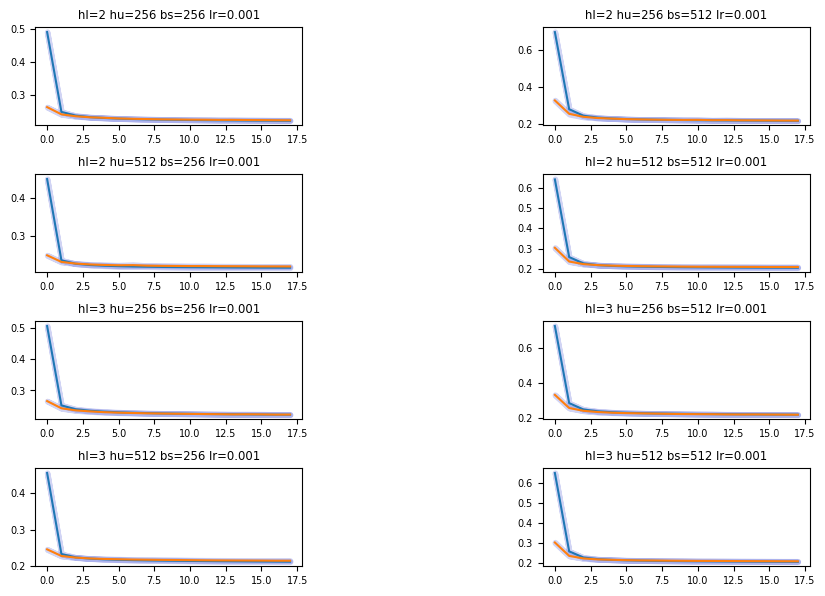

In [21]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})

fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(10,7),gridspec_kw={'wspace':0.9, 'hspace':0.5})
for evaluator, ax in zip(evaluators_table['moses_t-SMILES-RNN'], axes.flatten()):
    evaluator.plot_logs(ax)

In [14]:
ax.get_xlim()

(-0.45, 9.45)

## Metrics of Novels

In [40]:
novels = pd.concat( [evaluator.getResultsNovels() for evaluator in evaluators], ignore_index=True)

In [41]:
novels.drop(columns=['amount','epoch','T','dataset','aug','fold'],inplace=True)

In [42]:
novels

,FCD/Test,SNN/Test,Scaf/Test,IntDiv,IntDiv2,Filters,logP,SA,QED,weight,notation,hl,hu,bs,lr
0,0.760599,0.556150,0.704734,0.862241,0.855956,0.948333,0.123685,0.174454,0.018086,3.114350,SELFIES,2,512,256,0.001
1,0.651644,0.560603,0.723051,0.859259,0.853185,0.952000,0.120918,0.167315,0.015967,3.393076,SELFIES,2,512,256,0.001
2,0.702157,0.560156,0.699255,0.860350,0.854062,0.948833,0.096025,0.164264,0.015163,2.689290,SELFIES,2,512,256,0.001
3,0.732410,0.555034,0.708481,0.861002,0.854884,0.943000,0.105591,0.180714,0.020876,5.322761,SELFIES,2,512,256,0.001
4,0.715925,0.558505,0.694723,0.860363,0.854231,0.950000,0.110634,0.175604,0.018911,2.696556,SELFIES,2,512,256,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.590364,0.552461,0.646643,0.859528,0.853443,0.946667,0.030391,0.149119,0.019082,3.558769,t-SMILES,3,512,512,0.001
156,0.593058,0.552431,0.685436,0.859859,0.853716,0.949333,0.060565,0.145768,0.015807,2.746912,t-SMILES,3,512,512,0.001
157,0.607225,0.550773,0.671082,0.858938,0.852940,0.943333,0.161569,0.146670,0.018696,6.432642,t-SMILES,3,512,512,0.001
158,0.603639,0.557131,0.675021,0.856903,0.850823,0.938000,0.085407,0.122142,0.014038,3.532043,t-SMILES,3,512,512,0.001


In [43]:
novGrp=novels.groupby(['notation','hl','hu','bs','lr'], as_index=True, dropna=False)

In [45]:
novStats=novGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ]

In [46]:
novStats = ResultsFromMeanStdDF(novStats)

In [47]:
novStats.query(' hl==3 and hu==256 and bs==512 ')

,,,,,FCD/Test,SNN/Test,Scaf/Test,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
notation,hl,hu,bs,lr,,,,,,,,,,
SELFIES,3,256,512,0.001,1.0 ± 0.06,0.535 ± 0.002,0.7 ± 0.05,0.86 ± 0.001,0.854 ± 0.001,0.925 ± 0.009,0.17 ± 0.07,0.219 ± 0.009,0.025 ± 0.004,4.2 ± 0.9
SMILES,3,256,512,0.001,0.39 ± 0.03,0.56 ± 0.003,0.69 ± 0.04,0.8575 ± 0.0008,0.8514 ± 0.0008,0.989 ± 0.002,0.12 ± 0.03,0.07 ± 0.02,0.01 ± 0.004,6.0 ± 2.0
fragSMILES,3,256,512,0.001,0.32 ± 0.02,0.617 ± 0.005,0.74 ± 0.04,0.8564 ± 0.0009,0.8502 ± 0.001,0.991 ± 0.001,0.07 ± 0.02,0.04 ± 0.02,0.008 ± 0.004,3.8 ± 0.3
t-SMILES,3,256,512,0.001,0.67 ± 0.03,0.539 ± 0.003,0.64 ± 0.03,0.8597 ± 0.001,0.8535 ± 0.0009,0.944 ± 0.005,0.09 ± 0.02,0.15 ± 0.02,0.018 ± 0.005,6.0 ± 1.0


In [130]:
novStats.to_csv('results/06_mosesNovelMetrics.csv')

In [48]:
novPvals = pd.DataFrame.from_dict(
                {notation: 
                {metric:stats.ttest_ind(
                novGrp.get_group((notation,*params))[metric],
                novGrp.get_group(('fragSMILES',*params))[metric],
                ).pvalue for metric in novStats} for notation in ['SMILES','SELFIES','t-SMILES']
                }, orient='index'
            )

In [49]:
novPvals

,FCD/Test,SNN/Test,Scaf/Test,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
SMILES,4.920337e-03,1.265228e-08,0.050867,0.069558,0.059832,2.687339e-02,0.010661,6.217531e-02,0.415903,0.066027
SELFIES,1.592853e-08,2.802519e-10,0.158289,0.001495,0.000954,1.823304e-07,0.015890,1.749142e-07,0.000157,0.349210
t-SMILES,4.494242e-08,7.363552e-10,0.002022,0.000550,0.000535,1.364720e-08,0.195511,2.636571e-05,0.005184,0.005393


In [50]:
novPvals.map(lambda x: x<0.05)

,FCD/Test,SNN/Test,Scaf/Test,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
SMILES,True,True,False,False,False,True,True,False,False,False
SELFIES,True,True,False,True,True,True,True,True,True,False
t-SMILES,True,True,True,True,True,True,False,True,True,True
